<a href="https://colab.research.google.com/github/Aravindraprasad/Big-Mart-Sales-Prediction/blob/main/Big_Mart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/train.csv')
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [4]:
df.shape

(8523, 12)

Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [5]:
df.describe()

# from this i came to know about missing data in col -> Item_weight

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Check Null Values In The Dataset

In [6]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [8]:
# The percentage for null value in the column
per = df.isnull().sum() * 100 / len(df)
print(per)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


Taking Care of Duplicate Values


In [13]:
df.duplicated().any()

False

In [15]:
# Handling Missing values in Numberical
df['Item_Weight'].isnull().sum()

1463

In [16]:
# Handling Missing values in Categorical
df['Item_Weight'].isnull().sum()

1463

Filling Missing value in Two Approach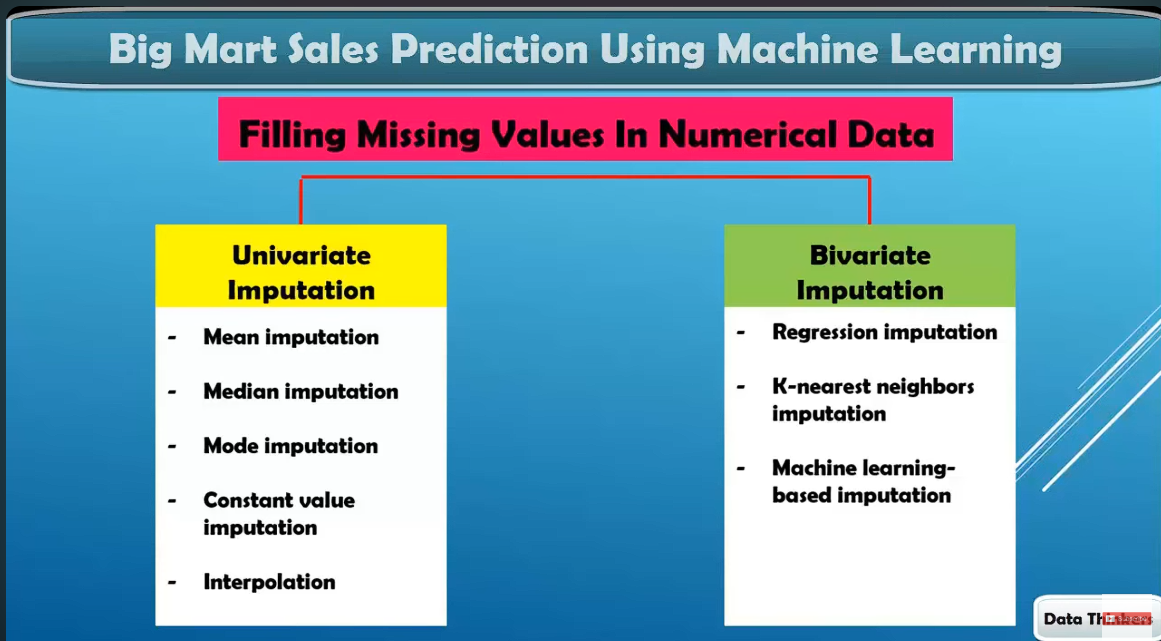

In [20]:
# Unicartiate Analysis -> Item_Weight
mean_weight = df['Item_Weight'].mean()
median_weight = df['Item_Weight'].median()
print(mean_weight,median_weight)

12.857645184135976 12.6


In [21]:
# Filling null values with mean and median in extra col
df['Item_Weight_mean']=df['Item_Weight'].fillna(mean_weight)
df['Item_Weight_median']=df['Item_Weight'].fillna(median_weight)

In [22]:
# checking the variance
print("Original Weight variable variance",df['Item_Weight'].var())
print("Item Weight variance after mean imputation",df['Item_Weight_mean'].var())
print("Item Weight variance after median imputation",df['Item_Weight_median'].var())

# Here the variance is descreased bcz we filled the null values using mean(cenral value) so the variance(spread) is decreasd

Original Weight variable variance 21.56168825983637
Item Weight variance after mean imputation 17.860121735060453
Item Weight variance after median imputation 17.869561454073366


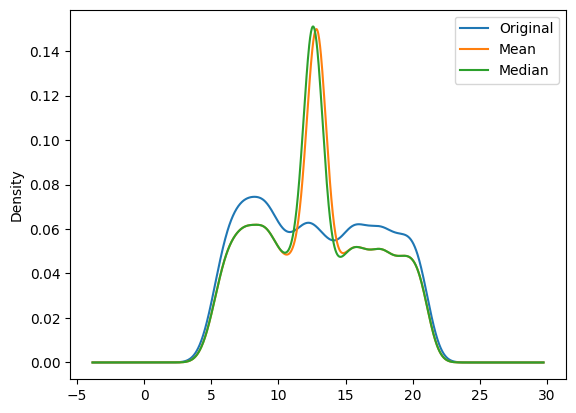

In [25]:
# Mean and Median has more value bcz we filled mean & median values in null
df['Item_Weight'].plot(kind = "kde",label="Original")

df['Item_Weight_mean'].plot(kind = "kde",label = "Mean")

df['Item_Weight_median'].plot(kind = "kde",label = "Median")

plt.legend()
plt.show()

<Axes: >

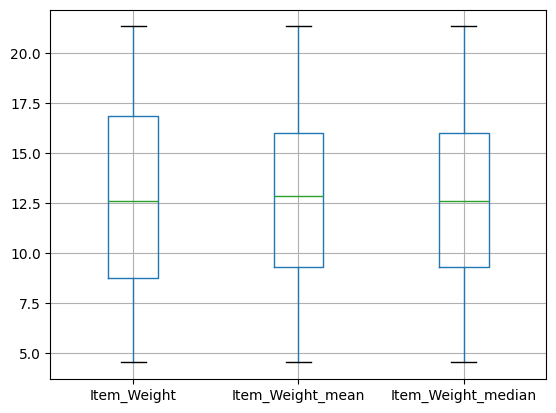

In [26]:
# Box plot -> here we can see the reduce in spread of data
df[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

### How Linear Interpolation Fills the Gap
 Input ->[2, NaN, 6]
- The first value is 2.
- The last value is 6.
- The missing value (NaN) is in the middle.
- Linear interpolation calculates the missing value by finding the halfway point between 2 and 6, like this:

Missing Value = (2+6) / 2 = 4

- So, after interpolation, the values become:

output-> [2, 4, 6]

In [27]:
#Applying Interpolate method

df['Item_Weight_interploate']=df['Item_Weight'].interpolate(method="linear")

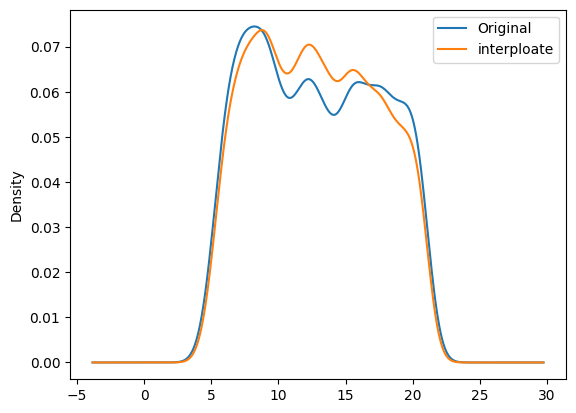

In [28]:
df['Item_Weight'].plot(kind = "kde",label="Original")

df['Item_Weight_interploate'].plot(kind = "kde",label = "interploate")

plt.legend()

# Here the values are similar

### Multivariate Imputaion

In [30]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=10,weights="distance")


In [31]:
df['knn_imputer']= knn.fit_transform(df[['Item_Weight']]).ravel()


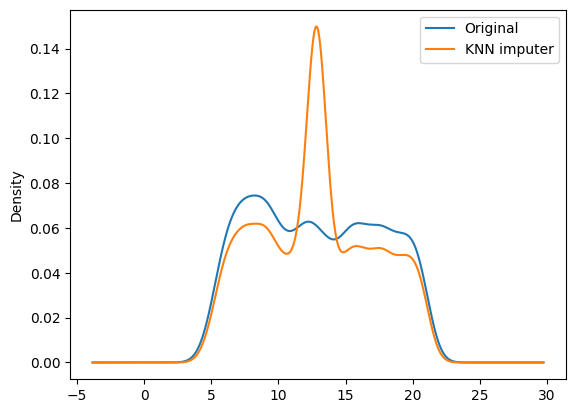

In [32]:
df['Item_Weight'].plot(kind = "kde",label="Original")

df['knn_imputer'].plot(kind = "kde",label = "KNN imputer")

plt.legend()
plt.show()

In [33]:
# Best method is interpolate so removing others

df = df.drop(['Item_Weight','Item_Weight_mean','Item_Weight_median','knn_imputer'],axis=1)
df.head(1)

# We have successfully fille the null values in -> Item_Weight

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3


### Fill NA in Outlet size -> Categorical

In [36]:
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [41]:
# We are going to fill NA based on the Outlet Type col frequency
df[['Outlet_Type','Outlet_Size']].value_counts().sort_index()

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  High            932
                   Medium          930
                   Small          1860
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: count, dtype: int64

In [48]:
mode_outlet = df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [50]:
mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [52]:
missing_values = df['Outlet_Size'].isnull()
missing_values

,Outlet_Size
0,False
1,False
2,False
3,True
4,False
...,...
8518,False
8519,True
8520,False
8521,False


In [53]:
df.loc[missing_values,'Outlet_Size'] = df.loc[missing_values,'Outlet_Type'].apply(lambda x :mode_outlet[x])
df.isnull().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0
Outlet_Type,0


### Item_Fat_Content

In [54]:
# Display all col

df.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interploate'],
      dtype='object')

In [56]:
df['Item_Fat_Content'].value_counts()

# There is no consistent label

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [58]:
# Making into consistent label

df.replace({'Item_Fat_Content':{'Low Fat':'LF','low fat':'LF','reg':'Regular'}},inplace=True)

In [60]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
LF,5517
Regular,3006


### Item_Visibility

In [61]:
df.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interploate'],
      dtype='object')

In [62]:
df['Item_Visibility'].value_counts()

,count
Item_Visibility,
0.000000,526
0.076975,3
0.162462,2
0.076841,2
0.073562,2
...,...
0.013957,1
0.110460,1
0.124646,1


In [64]:
df['Item_Visibility_interpolate']=df['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

In [65]:
df.head(1)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate
0,FDA15,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047


In [66]:

df['Item_Visibility_interpolate'].value_counts()

,count
Item_Visibility_interpolate,
0.076975,3
0.044024,2
0.040912,2
0.076856,2
0.078759,2
...,...
0.021011,1
0.099189,1
0.076866,1


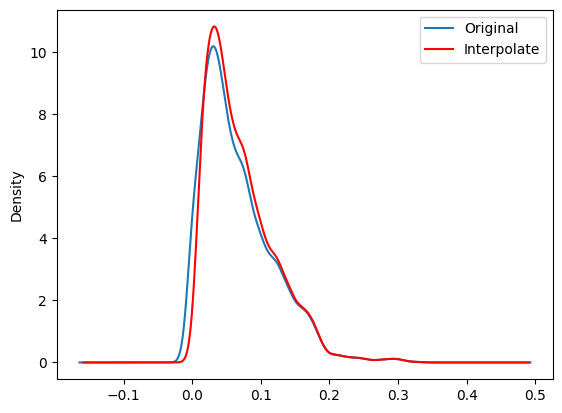

In [67]:
df['Item_Visibility'].plot(kind="kde",label="Original")

df['Item_Visibility_interpolate'].plot(kind="kde",color='red',label="Interpolate")

plt.legend()
plt.show()

In [68]:
df = df.drop('Item_Visibility',axis=1) # removing original col
df.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate
0,FDA15,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047


### Item_Type

In [69]:
df.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interploate', 'Item_Visibility_interpolate'],
      dtype='object')

In [70]:
df['Item_Type'].value_counts()

# This col has no NA

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


**Item_Identifier**

- Here the code contain FD,NC,DR -> food, non consumeable, drinks
- createing a seperate col

In [71]:
df.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interploate', 'Item_Visibility_interpolate'],
      dtype='object')

In [72]:
df['Item_Identifier'].value_counts().sample(5)

,count
Item_Identifier,
FDW38,7
NCQ30,5
NCO41,6
FDQ26,7
FDX43,6


In [76]:
df['Item_Identifier'] =df['Item_Identifier'].apply(lambda x : x[:2])
df['Item_Identifier'].value_counts()

,count
Item_Identifier,
FD,6125
NC,1599
DR,799


### Outlet_Establishment_Year

-

In [77]:

df.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interploate', 'Item_Visibility_interpolate'],
      dtype='object')

In [78]:
df['Outlet_Establishment_Year']

,Outlet_Establishment_Year
0,1999
1,2009
2,1999
3,1998
4,1987
...,...
8518,1987
8519,2002
8520,2004
8521,2009
